<a href="https://colab.research.google.com/github/udbtsteve/PUS2022_SBeattie/blob/main/HW5_responses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis on population trends

You are clustering the "shape" of time series to find trends, specifically, population growth trends. Do any countries stand out in the population growth trends in the past 60 years? are there groups of countries that have similar trends (and why?)

NOTE: your clusters may not be identical to mine!
## Imports

In [1]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.1 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


do this to read an excel file with python
then restart the notebook

In [2]:
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import preprocessing
from sklearn import cluster as cl

pl.rcParams['font.size'] = 18

# Data processing

## Get the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/Shareddrives/PUS2022/data

/content/drive/Shareddrives/PUS2022/data


In [5]:
#reading in the data
pop_df = pd.read_excel('SP.POP.TOTL?downloadformat=excel', skiprows=3)
pop_df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)             
pop_df.set_index("Country Name", inplace=True)
pop_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


##Data Cleaning 
remove NaNs, remove any unwanted columns

In [6]:
# I recommend you drop any column that is all NoN and any row that has any NaN 
# you control this (dropping only if all are, vs dropping if any is) with the 
# keyord "any" of .dropna()
pop_df_clean = pop_df.dropna(axis='columns', how='all').dropna(axis='rows', how='any')

In [7]:
# looking a little at the data
pop_df_clean.shape

(262, 61)

In [8]:
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [9]:
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


## Scaling (standardizing)

In [10]:
# standardizing the data
pop_standard = pd.DataFrame(preprocessing.scale(pop_df_clean, axis=1),
                            columns=pop_df_clean.columns,
                            index=pop_df_clean.index)

np.mean(pop_standard.iloc[0,:])
np.std(pop_standard.iloc[0,:])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


1.0

## Visualize the data

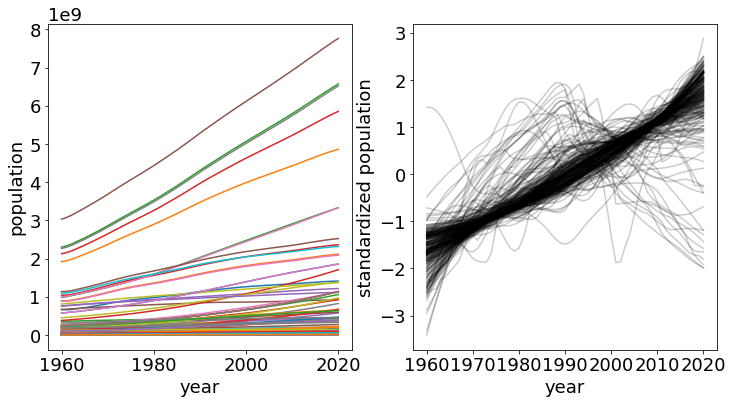

In [11]:
# looking at the data
fig, ax = pl.subplots(1,2, figsize=(12,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
ax[1].plot(pop_standard.T, color="k", alpha=0.2)

ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[1].set_xlabel("year")
ax[1].set_ylabel("standardized population")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);

Fig. 1: (Left) Cleaned annual population data from included countries between 1960 and 2020; (Right) Cleaned annual population data after standardization (mu=0, sigma=1).

<br/>

While the right-hand plot discards information on the absolute and relative magnitudes of the set of time series, the standardized time series plot allow us to compare trends in 1st and 2nd moment statistics between time series.

# Make a cluster model with KMeans

# Use an elbow plot to figure out ideal cluster _n_ 

In [15]:
# For n_clusters = 2 this would look as:
#model = cluster.KMeans(n_clusters = 2)
#model.fit(pop_standard)
#model.inertia_

# models = {}
inertias = dict()
for numClusters in range(2,10,1):
  model = cl.KMeans(n_clusters = numClusters).fit(pop_standard)
  inertias[numClusters] = model.inertia_

print(inertias)

{2: 1249.5287124898719, 3: 846.602551696185, 4: 642.5573192964408, 5: 561.2284111940547, 6: 495.3978164482319, 7: 422.41086429024836, 8: 373.80255987076134, 9: 342.9823056364228}


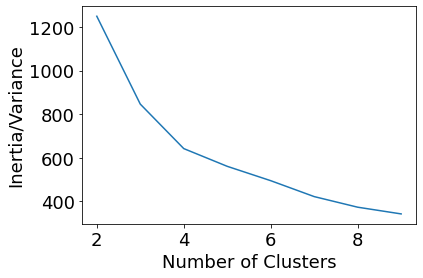

In [17]:
# use the "inertia" (intracluster variance essentially) to make an Elbow plot: 
# inertia is the y axis, the number of clusters are the x axis.
# assess if the elbow plot shows an inflection, which you can use to determin the "right" number of clusters

l = sorted(inertias.items())
x, y = zip(*l)

pl.plot(x, y)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");

Figure 2: "Elbow plot" of k-means clustering of our time series. The y axis shows the sum of squared distances to the closest centroid (scikit calls this "inertia", Fed called it "variance").

<br/>

--> Technically, it looks like 4 shows the biggest "inflection point" with respect to the surrounding values! Even more reason to go with it.

## Pick a model

In [24]:
# time for a k-means cluster!!
numClusters = 4
c = cl.KMeans(n_clusters = numClusters).fit(pop_standard)
print(c.labels_)

[3 3 3 3 3 2 0 3 3 0 2 0 3 3 3 0 3 3 3 3 0 1 3 0 1 2 3 0 3 0 0 0 0 0 0 0 2
 3 0 0 0 3 3 3 3 0 3 3 0 0 2 2 3 3 2 0 0 2 3 0 0 0 0 0 0 0 0 3 0 0 1 3 0 3
 0 0 0 2 0 3 3 1 3 0 3 3 3 3 0 3 2 3 0 2 0 0 3 3 1 3 1 0 0 3 3 0 3 0 0 3 0
 3 3 3 0 0 3 2 2 3 0 3 3 3 0 0 3 3 3 0 0 0 3 3 0 0 0 0 0 0 1 3 1 3 0 0 3 2
 3 3 3 0 0 0 2 3 3 0 0 2 0 0 3 3 0 3 3 0 3 0 3 3 0 0 3 0 0 3 0 3 3 3 3 0 0
 0 3 2 3 2 0 0 0 0 0 0 3 1 2 3 0 3 3 3 3 3 3 0 0 3 2 3 3 3 3 3 3 2 2 3 0 0
 0 0 3 3 0 0 3 0 3 0 0 3 0 2 0 3 0 0 0 0 3 3 1 0 0 0 0 2 0 3 2 0 3 0 0 2 3
 0 3 0]


how many objects in each cluster?

In [26]:
for i in range(numClusters):
  print ("total items in cluster {:d}: {:d}".format(
      i+1, np.sum(c.labels_ == i)))

total items in cluster 1: 116
total items in cluster 2: 10
total items in cluster 3: 26
total items in cluster 4: 110


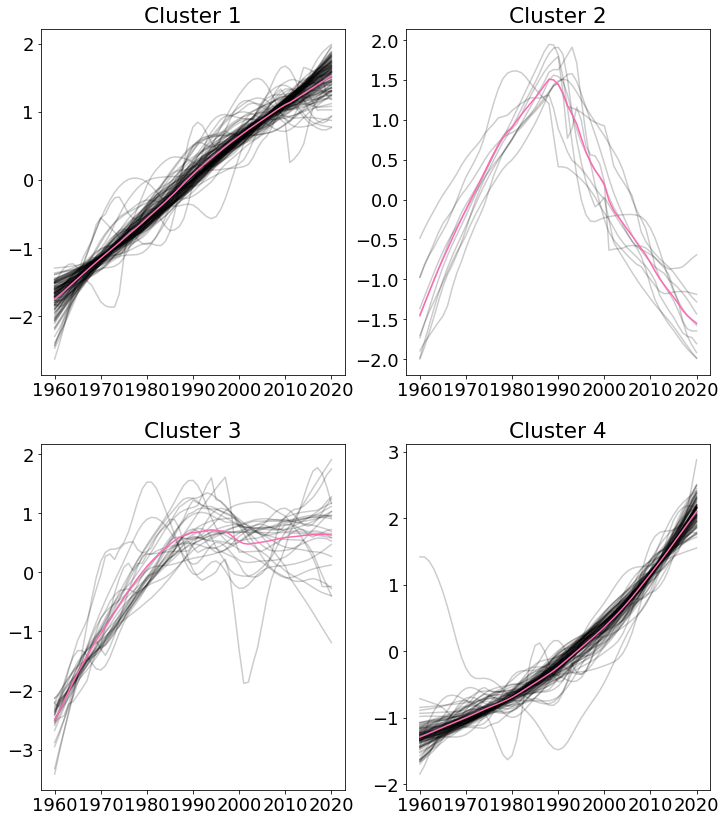

In [43]:
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[model.labels_ == 0].T, "k", alpha=0.2);
ax[0,0].plot(c.cluster_centers_[0], color="hotpink")

ax[0,1].set_title("Cluster 2")
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,1].plot(pop_standard[model.labels_ == 1].T, "k", alpha=0.2);
ax[0,1].plot(c.cluster_centers_[1], color="hotpink")

ax[1,0].set_title("Cluster 3")
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,0].plot(pop_standard[model.labels_ == 2].T, "k", alpha=0.2);
ax[1,0].plot(c.cluster_centers_[2], color="hotpink")

ax[1,1].set_title("Cluster 4")
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,1].plot(pop_standard[model.labels_ == 3].T, "k", alpha=0.2);
ax[1,1].plot(c.cluster_centers_[3], color="hotpink")

Figure 3: Results of using k-means clustering on the standardized data seen in Figure 1. The mean line for each cluster is visible in pink.

Cluster 1 is a a fairly linear upward trend with some outliers and cluster 4 a more curved upward trend. Cluster 2 and cluster 4 have fewer time series; 2 rises steadily before a big drop in the 1990s whereas the countries in 3 kind of hit a plateau around the 1990s. 

# Identifying the countries in the smallest clusters

plot the two smallest clusters with labels for the countries

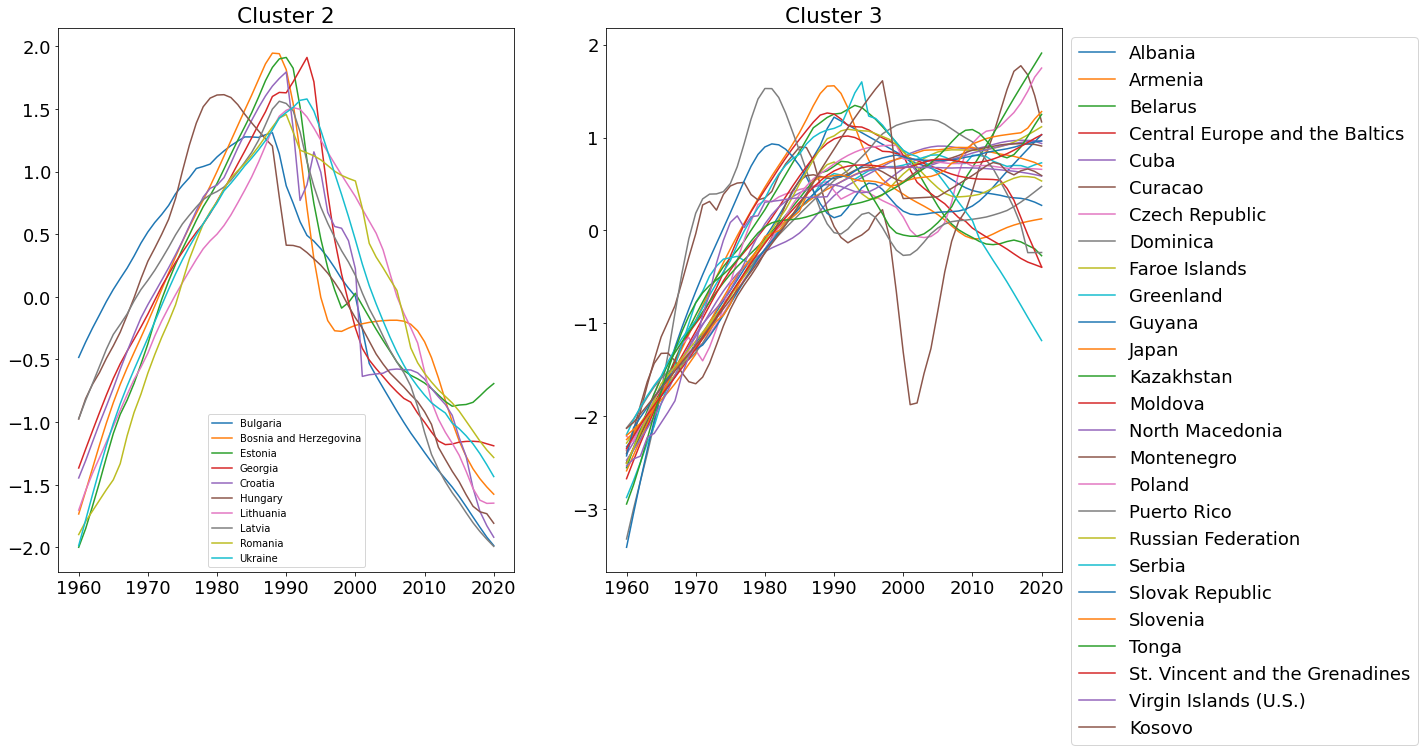

In [46]:
fig,ax = pl.subplots(1,2, figsize=(18,10))

ax[0].set_title("Cluster 2")
ax[0].set_xticks(range(0,70,10))
ax[0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0].plot(pop_standard[c.labels_ == 1].T)
ax[0].legend(labels=pop_df_clean.loc[c.labels_ == 1].index, fontsize=10)

ax[1].set_title("Cluster 3")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1].plot(pop_standard[c.labels_ == 2].T);
# placing legend method via https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/
ax[1].legend(labels=pop_df_clean.loc[c.labels_ == 2].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')


Figure 4: Visualization of sparse clusters, and identification of countries grouped into them; (Left) Cluster 2 from the adopted K-Means model, with a steep rise in mean population, followed by a steep population decline; (Right) Cluster 3, with a population rise comparable to Cluster 2, but with maintained population after ~1985.

<br/>

---

<br/>

In Cluster 2, the population growth and decline 'group', we near-exclusively see countries that were part of the USSR -- until the USSR was disbanded around 1990. It appears that, while Hungry wasn't part of the USSR, its economy may have been strongly based on international exchange with USSR countries.

<br/>

Relatedly, the most notable outlier country in Cluster 3 is Kosovo, where a war was fought over Serbian Yugoslavs' persecution (and eventually outright genocide) of 'ethnic' Albanians in the country. During the conflict there was a sharp decline in Kosovo's population, until 1999 when international military intervention began 'formally'. Population plateaued for a couple of years, followed by a consistent sharp increase which has placed it near the top of Cluster 3 countries in terms of population. 

<br/>

For what it may or may not be worth, the population of Serbia has either plateaued near ~1990 levels, or has been in sharp decline since the early 1990's, depending on which teal curve represents it. 

<br/>

-----------------

<br/>

In either case, Cluster 3 holds a diverse collection of countries in the world which, similar to either Kosovo or Greenland (as the case may be), have population curves (over time) that are generally 'flat' after the late 1980's. 

<br/>

It's unclear whether these countries are linked by a single subset of historical circumstances, which has managed to profoundly impacted the countries' population growth as compared to countries in Clusters 1,4. A simpler explanation may be that Cluster 3 isolates examples of countries which have produced a 'metabolism' equilibrium under which population is consistent.

<br/>

Unfortunately, this does not imply that Cluster 3 countries are "sustainable", "equitable", or "economically healthy" -- with the exception of the potentially increased sustainability in population density that Cluster 3 countries may have compared to countries in Clusters 1, 4. To bring the discussion full-circle, the Russian Federation can be considered a strong example of this observation.

<br/>

-----------------